# Tarea 2

## Pregunta 1

### Calculos de Gamma(h)

In [ ]:
library(MASS)

In [2]:
I<- diag(9)
A_1<-matrix(c(0.7,0,0.9,0.1,0.4,0,0,0.1,0.8), ncol = 3) 
AxA<-kronecker(A_1,A_1) 
v_sigma<-c(0.26,0.03,0,0.03,0.09,0,0,0,0.81) 
sigma<-matrix(v_sigma,ncol=3)
inv<-solve(I-AxA)

In [3]:
gamma_0=matrix(inv%*%v_sigma,ncol=3) 
gamma_0

0.5644039,0.1769069,1.051951
0.1769069,0.3079040,1.142028
1.0519508,1.1420280,7.727712


In [4]:
gamma_1=A_1%*%gamma_0
gamma_1

0.4127735,0.1546253,0.8505684
0.1759579,0.2373644,1.2295824
1.3495242,1.0728386,7.1289253


In [5]:
gamma_2=A_1%*%gamma_1
gamma_2

0.3065372,0.1319741,0.7183561
0.2053356,0.2022296,1.2047255
1.4511155,0.9974336,6.4686518


In [6]:
gamma_3=A_1%*%gamma_2
gamma_3

0.2351096,0.1126048,0.6233218
0.2272458,0.1806352,1.1287554
1.4367758,0.9167236,5.8214419


In [7]:
D_1<-diag(1/((diag(gamma_0))^(1/2)))
D_1

1.331083,0.000000,0.0000000
0.000000,1.802156,0.0000000
0.000000,0.000000,0.3597282


### Calculos de R(h)

In [8]:
R_0=D_1%*%gamma_0%*%D_1
R_0

1.0000000,0.4243676,0.5037035
0.4243676,1.0000000,0.7403611
0.5037035,0.7403611,1.0000000


In [9]:
R_1=D_1%*%gamma_1%*%D_1
R_1

0.7313440,0.3709179,0.4072759
0.4220909,0.7709039,0.7971215
0.6461899,0.6955066,0.9225144


In [10]:
R_2=D_1%*%gamma_2%*%D_1
R_2

0.5431167,0.3165819,0.3439690
0.4925627,0.6567944,0.7810071
0.6948347,0.6466226,0.8370721


In [11]:
R_3=D_1%*%gamma_3%*%D_1
R_3

0.4165626,0.2701185,0.2984639
0.5451213,0.5866608,0.7317567
0.6879685,0.5942994,0.7533202


In [12]:
RS=list(R_0,R_1,R_2,R_3)


## Pregunta 2

### A.

In [13]:
Ct<-matrix(c(0.3,-0.1,0,0.2,0,0,0,0.6,-0.1,0,-0.1,-0.1,-0.9,0,0.2,0,0,0,-1,0,0,1,0,0,0,-1,0,0,1,0,0,0,-1,0,0,1), ncol = 6) #La matriz esta transpuesta
C=t(Ct) #MATRIZ I_{k}-Az
A<-diag(6)-C # Matriz A
A

0.7,0.1,0.0,-0.2,0.0,0.0
0.0,0.4,0.1,0.0,0.1,0.1
0.9,0.0,0.8,0.0,0.0,0.0
1.0,0.0,0.0,0.0,0.0,0.0
0.0,1.0,0.0,0.0,0.0,0.0
0.0,0.0,1.0,0.0,0.0,0.0


In [14]:
Y_t=c(0.7,1,1.5,1,1.5,3)
Y_t # Vector Y
J<-matrix(c(diag(3),matrix(0,3,3)),ncol=6)
J  # Vector J que devuelve el VAR(1) a VAR(2)

[1] 0.7 1.0 1.5 1.0 1.5 3.0

1,0,0,0,0,0
0,1,0,0,0,0
0,0,1,0,0,0


In [15]:
mu=c(0,0,0)
u_1<-mvrnorm(1,mu=mu,Sigma=sigma)
U<-c(u_1,0,0,0)
U

[1]  0.083572365  0.072585770 -0.004421314  0.000000000  0.000000000
[6]  0.000000000

In [16]:
Y_t1=A%*%Y_t+diag(6)%*%U
Y_2001=J%*%Y_t1 #Predicción al 2001
Y_2001

0.4735724
1.0725858
1.8255787


In [17]:
u_1<-mvrnorm(1,mu=mu,Sigma=sigma)
U_1<-c(u_1,0,0,0)
U_1
u_2<-mvrnorm(1,mu=mu,Sigma=sigma)
U_2<-c(u_2,0,0,0)
U_2

[1]  0.39989970  0.56530038 -0.02229445  0.00000000  0.00000000  0.00000000

[1] 0.44847059 0.04017045 0.38150053 0.00000000 0.00000000 0.00000000

In [18]:
Y_t2=A%*%Y_t+A%*%U_2+diag(6)%*%U
Y_2002=J%*%Y_t2 #Predicción al 2002
Y_2002

0.7915188
1.1268040
2.5344026


In [19]:
u_1<-mvrnorm(1,mu=mu,Sigma=sigma)
U_1<-c(u_1,0,0,0)
U_1
u_2<-mvrnorm(1,mu=mu,Sigma=sigma)
U_2<-c(u_2,0,0,0)
U_2
u_3<-mvrnorm(1,mu=mu,Sigma=sigma)
U_3<-c(u_3,0,0,0)
U_3

[1] 0.003177084 0.868263214 0.174386862 0.000000000 0.000000000 0.000000000

[1]  0.13619085  0.01130849 -0.01312080  0.00000000  0.00000000  0.00000000

[1] -0.4117856 -0.6447418  1.6254642  0.0000000  0.0000000  0.0000000

In [20]:
Y_t3=A%*%Y_t+diag(6)%*%U+A%*%U_2+A%*%A%*%U_3
Y_2003=J%*%Y_t3 #Predicción al 2003
Y_2003

0.395952
1.228706
2.364014


### B.

In [21]:
Jt=t(J)

In [22]:
phi_1=J%*%A%*%Jt 
phi_1

0.7,0.1,0.0
0.0,0.4,0.1
0.9,0.0,0.8


In [23]:
phi_2=J%*%A%*%A%*%Jt
phi_2

0.29,0.11,0.01
0.09,0.26,0.22
1.35,0.09,0.64


In [24]:
MSE_1=J%*%diag(6)%*%t(J)
MSE_1

1,0,0
0,1,0
0,0,1


In [25]:
MSE_2=phi_1%*%sigma%*%t(phi_1)+MSE_1
MSE_2

1.1325,0.0120,0.1665
0.0120,1.0225,0.0756
0.1665,0.0756,1.7290


In [26]:
MSE_3=phi_2%*%sigma%*%t(phi_2)+MSE_2
MSE_3

1.157450,0.025701,0.279603
0.025701,1.071298,0.234117
0.279603,0.234117,2.542645


### C.

In [27]:
z90=qnorm(0.95)
Z90<-c(z90,z90,z90)
z95=qnorm(0.975)
Z95<-c(z95,z95,z95)

In [28]:
Z90
c((diag(sigma))^(1/2))
Y_2001

[1] 1.644854 1.644854 1.644854

[1] 0.509902 0.300000 0.900000

0.4735724
1.0725858
1.8255787


### Intervalos de confianza del 90% para predicciones

In [29]:
IC90_2001=data.frame(Variables=c('GNP','M2','IR'),Confianza='90%',lim_inf=Y_2001-Z90*c((diag(sigma))^(1/2)),pred=Y_2001,lim_sup=Y_2001+Z90*c((diag(sigma))^(1/2)))
IC90_2001

Variables,Confianza,lim_inf,pred,lim_sup
<fct>,<fct>,<dbl>,<dbl>,<dbl>
GNP,90%,-0.3651417,0.4735724,1.312286
M2,90%,0.5791297,1.0725858,1.566042
IR,90%,0.3452104,1.8255787,3.305947


In [30]:
IC90_2002=data.frame(Variables=c('GNP','M2','IR'),Confianza='90%',lim_inf=Y_2002-Z90*c((diag(sigma))^(1/2)),pred=Y_2002,lim_sup=Y_2002+Z90*c((diag(sigma))^(1/2)))
IC90_2002

Variables,Confianza,lim_inf,pred,lim_sup
<fct>,<fct>,<dbl>,<dbl>,<dbl>
GNP,90%,-0.04719525,0.7915188,1.630233
M2,90%,0.63334791,1.1268040,1.620260
IR,90%,1.05403438,2.5344026,4.014771


In [31]:
IC90_2003=data.frame(Variables=c('GNP','M2','IR'),Confianza='90%',lim_inf=Y_2003-Z90*c((diag(sigma))^(1/2)),pred=Y_2003,lim_sup=Y_2003+Z90*c((diag(sigma))^(1/2)))
IC90_2003

Variables,Confianza,lim_inf,pred,lim_sup
<fct>,<fct>,<dbl>,<dbl>,<dbl>
GNP,90%,-0.4427620,0.395952,1.234666
M2,90%,0.7352496,1.228706,1.722162
IR,90%,0.8836453,2.364014,3.844382


### Intervalos de confianza del 95% para predicciones

In [32]:
IC95_2001=data.frame(Variables=c('GNP','M2','IR'),Confianza='95%',lim_inf=Y_2001-Z95*c((diag(sigma))^(1/2)),pred=Y_2001,lim_sup=Y_2001+Z95*c((diag(sigma))^(1/2)))
IC95_2001

Variables,Confianza,lim_inf,pred,lim_sup
<fct>,<fct>,<dbl>,<dbl>,<dbl>
GNP,95%,-0.5258171,0.4735724,1.472962
M2,95%,0.4845966,1.0725858,1.660575
IR,95%,0.0616111,1.8255787,3.589546


In [33]:
IC95_2002=data.frame(Variables=c('GNP','M2','IR'),Confianza='95%',lim_inf=Y_2002-Z95*c((diag(sigma))^(1/2)),pred=Y_2002,lim_sup=Y_2002+Z95*c((diag(sigma))^(1/2)))
IC95_2002

Variables,Confianza,lim_inf,pred,lim_sup
<fct>,<fct>,<dbl>,<dbl>,<dbl>
GNP,95%,-0.2078706,0.7915188,1.790908
M2,95%,0.5388148,1.1268040,1.714793
IR,95%,0.7704351,2.5344026,4.298370


In [34]:
IC95_2003=data.frame(Variables=c('GNP','M2','IR'),Confianza='95%',lim_inf=Y_2003-Z95*c((diag(sigma))^(1/2)),pred=Y_2003,lim_sup=Y_2003+Z95*c((diag(sigma))^(1/2)))
IC95_2003

Variables,Confianza,lim_inf,pred,lim_sup
<fct>,<fct>,<dbl>,<dbl>,<dbl>
GNP,95%,-0.6034374,0.395952,1.395341
M2,95%,0.6407164,1.228706,1.816695
IR,95%,0.6000460,2.364014,4.127981


### Intervalos de confianza unidos

In [35]:
IC_2001=rbind(IC90_2001,IC95_2001)
IC_2001

Variables,Confianza,lim_inf,pred,lim_sup
<fct>,<fct>,<dbl>,<dbl>,<dbl>
GNP,90%,-0.3651417,0.4735724,1.312286
M2,90%,0.5791297,1.0725858,1.566042
IR,90%,0.3452104,1.8255787,3.305947
GNP,95%,-0.5258171,0.4735724,1.472962
M2,95%,0.4845966,1.0725858,1.660575
IR,95%,0.0616111,1.8255787,3.589546


In [36]:
IC_2002=rbind(IC90_2002,IC95_2002)
IC_2002

Variables,Confianza,lim_inf,pred,lim_sup
<fct>,<fct>,<dbl>,<dbl>,<dbl>
GNP,90%,-0.04719525,0.7915188,1.630233
M2,90%,0.63334791,1.1268040,1.620260
IR,90%,1.05403438,2.5344026,4.014771
GNP,95%,-0.20787064,0.7915188,1.790908
M2,95%,0.53881481,1.1268040,1.714793
IR,95%,0.77043505,2.5344026,4.298370


In [37]:
IC_2003=rbind(IC90_2003,IC95_2003)
IC_2003

Variables,Confianza,lim_inf,pred,lim_sup
<fct>,<fct>,<dbl>,<dbl>,<dbl>
GNP,90%,-0.4427620,0.395952,1.234666
M2,90%,0.7352496,1.228706,1.722162
IR,90%,0.8836453,2.364014,3.844382
GNP,95%,-0.6034374,0.395952,1.395341
M2,95%,0.6407164,1.228706,1.816695
IR,95%,0.6000460,2.364014,4.127981


### D.

Primero creamos intervalos de confianza del 99%

In [38]:
Z99=qnorm(0.995)
GNP_2001=data.frame(Variable='GNP_2001',lim_inf=Y_2001[1]-Z99*c((diag(sigma))^(1/2))[1],lim_sup=Y_2001[1]+Z99*c((diag(sigma))^(1/2))[1])
GNP_2002=data.frame(Variable='GNP_2002',lim_inf=Y_2002[1]-Z99*c((diag(sigma))^(1/2))[1],lim_sup=Y_2002[1]+Z99*c((diag(sigma))^(1/2))[1])
GNP_2003=data.frame(Variable='GNP_2003',lim_inf=Y_2003[1]-Z99*c((diag(sigma))^(1/2))[1],lim_sup=Y_2003[1]+Z99*c((diag(sigma))^(1/2))[1])
IC_GNP_99=rbind(GNP_2001,GNP_2002,GNP_2003)
IC_GNP_99

Variable,lim_inf,lim_sup
<fct>,<dbl>,<dbl>
GNP_2001,-0.8398480,1.786993
GNP_2002,-0.5219016,2.104939
GNP_2003,-0.9174684,1.709372


In [39]:
RS=list(R_0,R_1,R_2,R_3)
uu=list()
ud=list()
ut=list()
du=list()
dd=list()
dt=list()
tu=list()
td=list()
tt=list()

for (i in RS){
    uu=c(uu,i[1,1])
    ud=c(ud,i[1,2])
    ut=c(ut,i[1,3])
    du=c(du,i[2,1])
    dd=c(dd,i[2,2])
    dt=c(dt,i[2,3])
    tu=c(tu,i[3,1])
    td=c(td,i[3,2])
    tt=c(tt,i[3,3])}

In [40]:
uu
ud
ut
du
dd
dt
tu
td
tt

[[1]]
[1] 1

[[2]]
[1] 0.731344

[[3]]
[1] 0.5431167

[[4]]
[1] 0.4165626

[[1]]
[1] 0.4243676

[[2]]
[1] 0.3709179

[[3]]
[1] 0.3165819

[[4]]
[1] 0.2701185

[[1]]
[1] 0.5037035

[[2]]
[1] 0.4072759

[[3]]
[1] 0.343969

[[4]]
[1] 0.2984639

[[1]]
[1] 0.4243676

[[2]]
[1] 0.4220909

[[3]]
[1] 0.4925627

[[4]]
[1] 0.5451213

[[1]]
[1] 1

[[2]]
[1] 0.7709039

[[3]]
[1] 0.6567944

[[4]]
[1] 0.5866608

[[1]]
[1] 0.7403611

[[2]]
[1] 0.7971215

[[3]]
[1] 0.7810071

[[4]]
[1] 0.7317567

[[1]]
[1] 0.5037035

[[2]]
[1] 0.6461899

[[3]]
[1] 0.6948347

[[4]]
[1] 0.6879685

[[1]]
[1] 0.7403611

[[2]]
[1] 0.6955066

[[3]]
[1] 0.6466226

[[4]]
[1] 0.5942994

[[1]]
[1] 1

[[2]]
[1] 0.9225144

[[3]]
[1] 0.8370721

[[4]]
[1] 0.7533202

In [41]:
pasosH=list(0,1,2,3)
pasosH

[[1]]
[1] 0

[[2]]
[1] 1

[[3]]
[1] 2

[[4]]
[1] 3

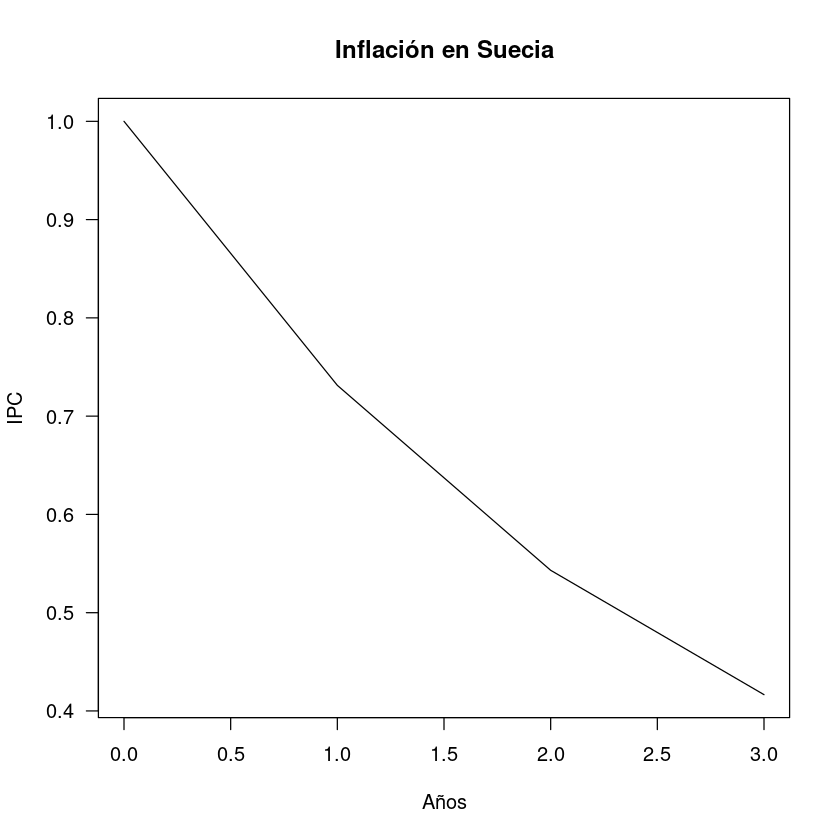

In [45]:
matplot(pasosH, cbind(uu),type="l",lty=c(1,1),xlab='Años',ylab='IPC',main='Inflación en Suecia',las=1)

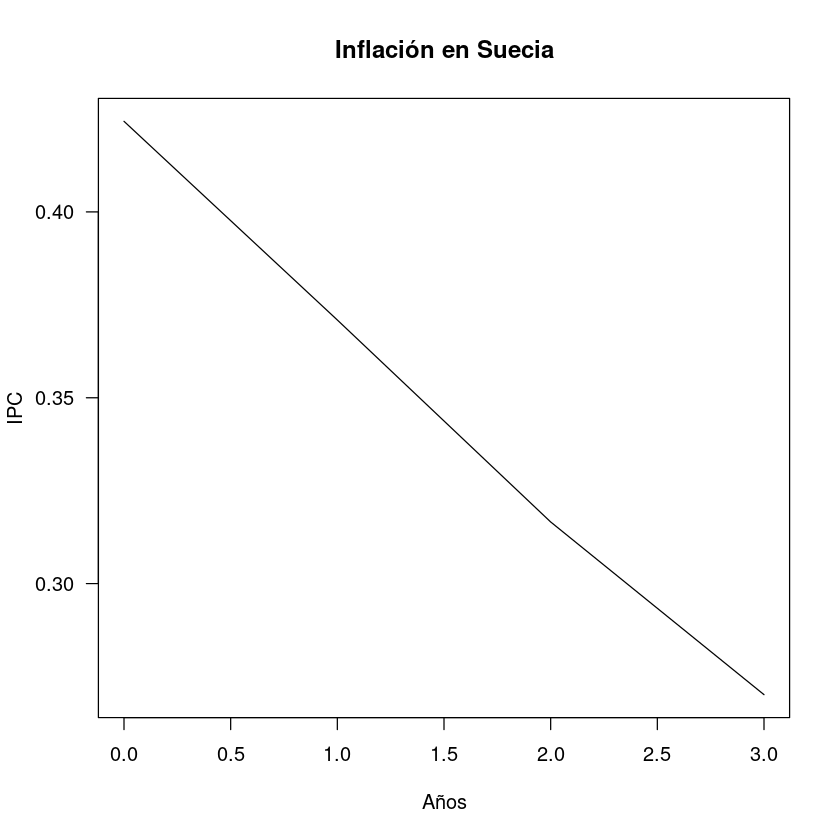

In [60]:
matplot(pasosH, cbind(ud),type="l",lty=c(1,1),xlab='Años',ylab='IPC',main='Inflación en Suecia',las=1)

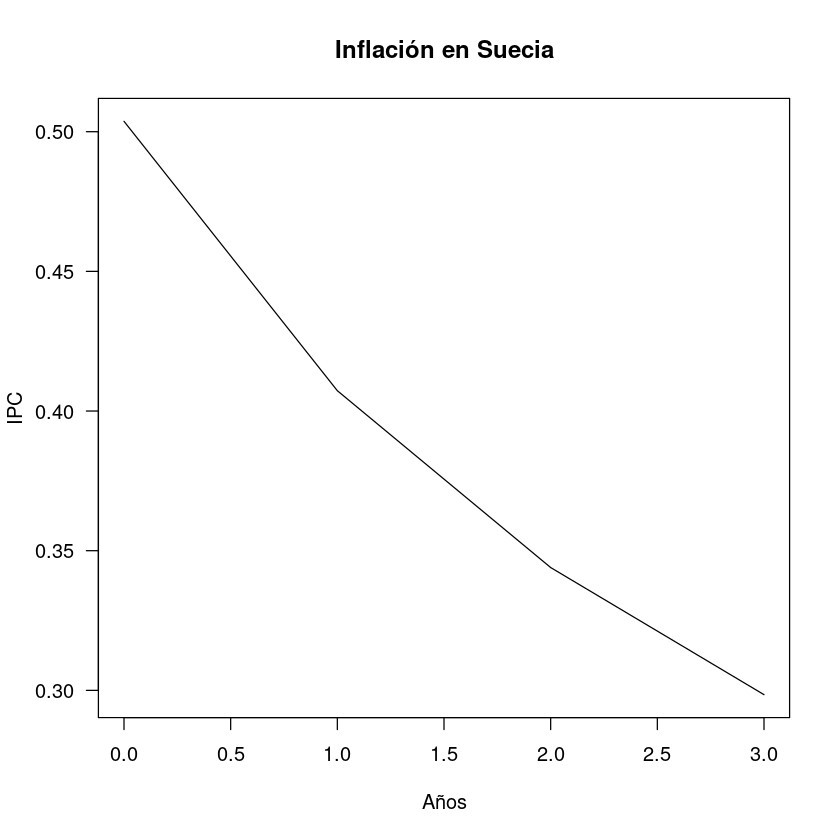

In [59]:
matplot(pasosH, cbind(ut),type="l",lty=c(1,1),xlab='Años',ylab='IPC',main='Inflación en Suecia',las=1)

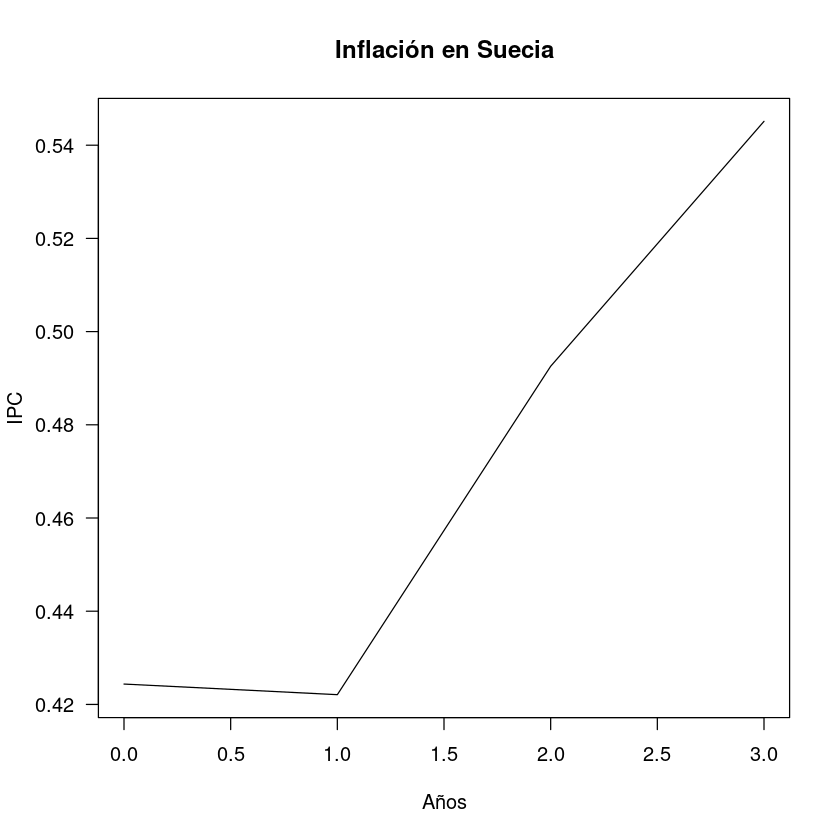

In [58]:
matplot(pasosH, cbind(du),type="l",lty=c(1,1),xlab='Años',ylab='IPC',main='Inflación en Suecia',las=1)

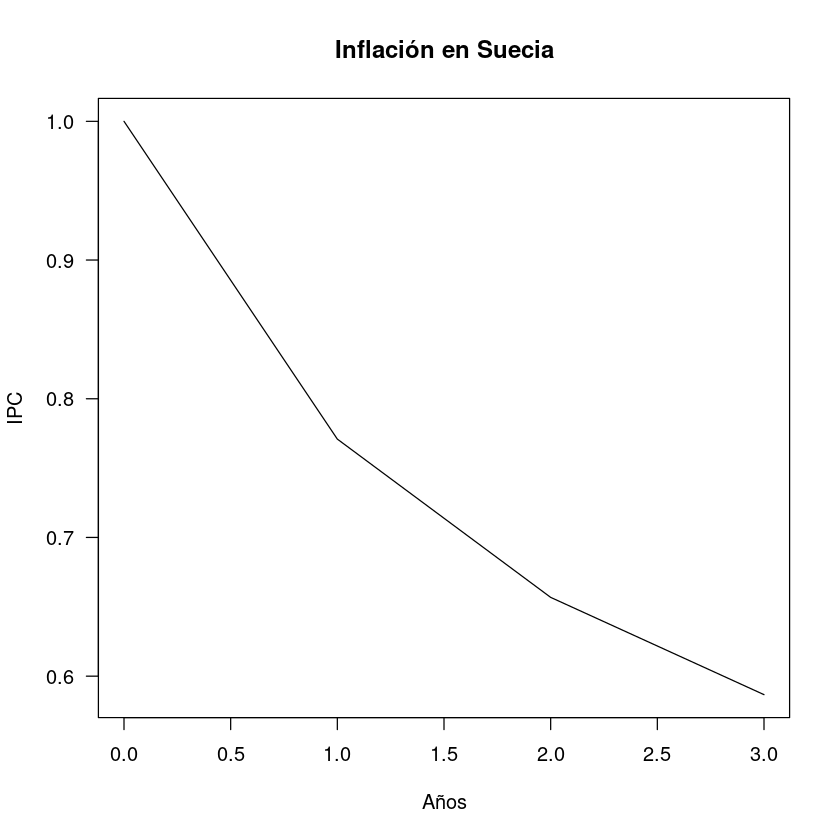

In [57]:
matplot(pasosH, cbind(dd),type="l",lty=c(1,1),xlab='Años',ylab='IPC',main='Inflación en Suecia',las=1)

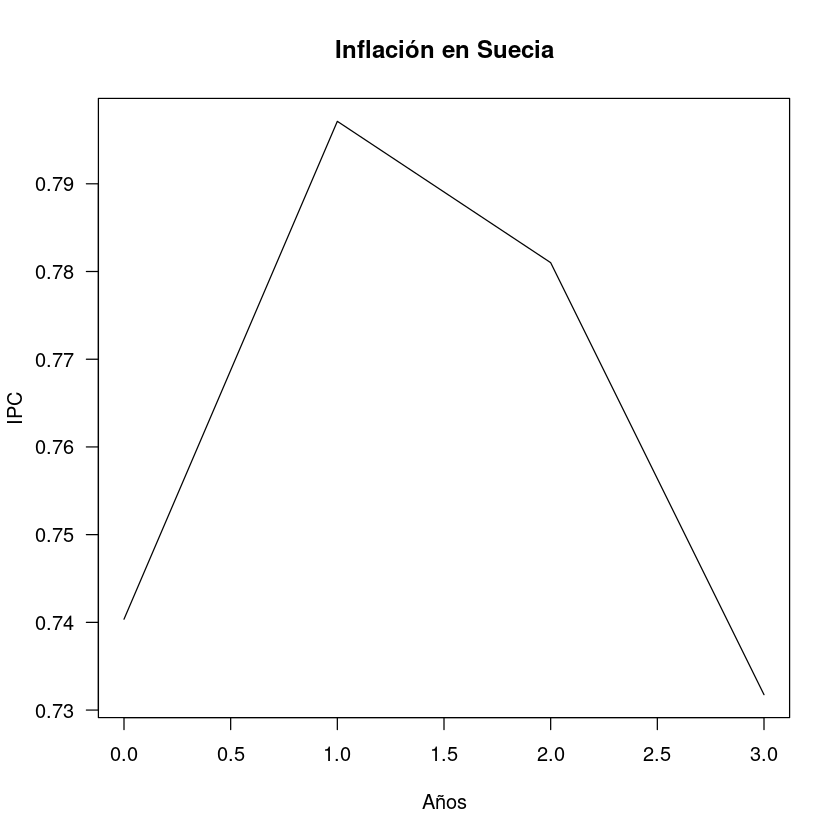

In [56]:
matplot(pasosH, cbind(dt),type="l",lty=c(1,1),xlab='Años',ylab='IPC',main='Inflación en Suecia',las=1)

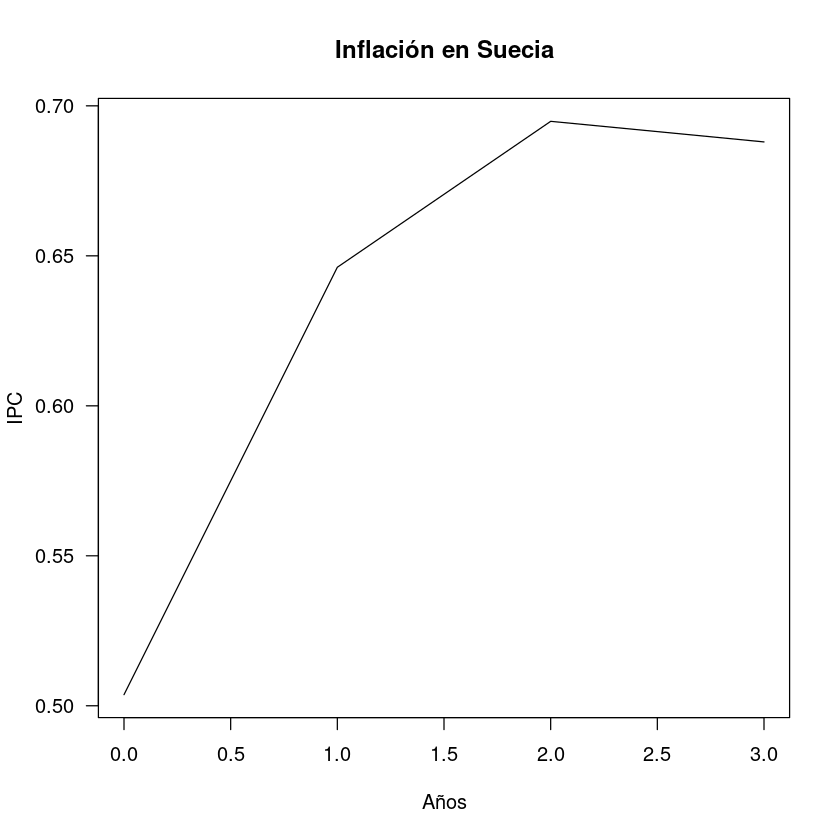

In [55]:
matplot(pasosH, cbind(tu),type="l",lty=c(1,1),xlab='Años',ylab='IPC',main='Inflación en Suecia',las=1)

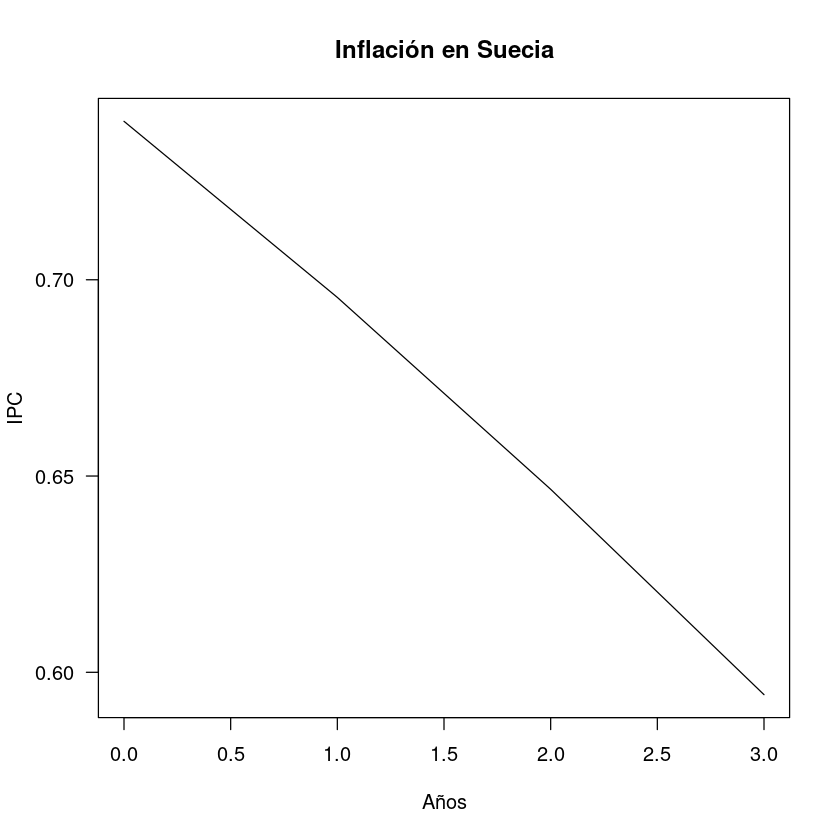

In [62]:
matplot(pasosH, cbind(td),type="l",lty=c(1,1),xlab='Años',ylab='IPC',main='Inflación en Suecia',las=1)

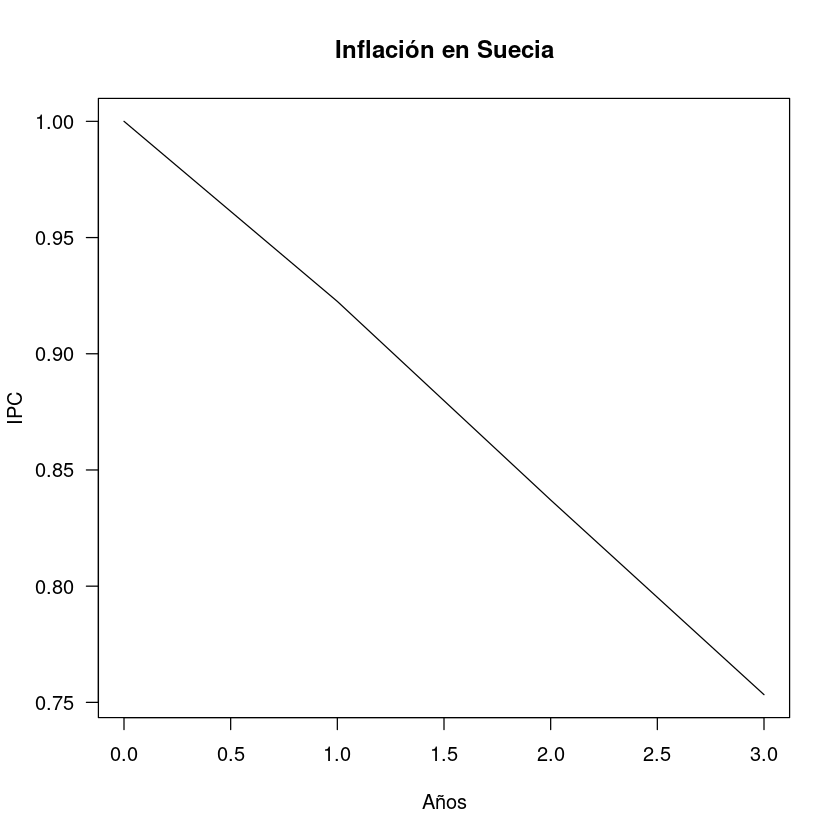

In [63]:
matplot(pasosH, cbind(tt),type="l",lty=c(1,1),xlab='Años',ylab='IPC',main='Inflación en Suecia',las=1)

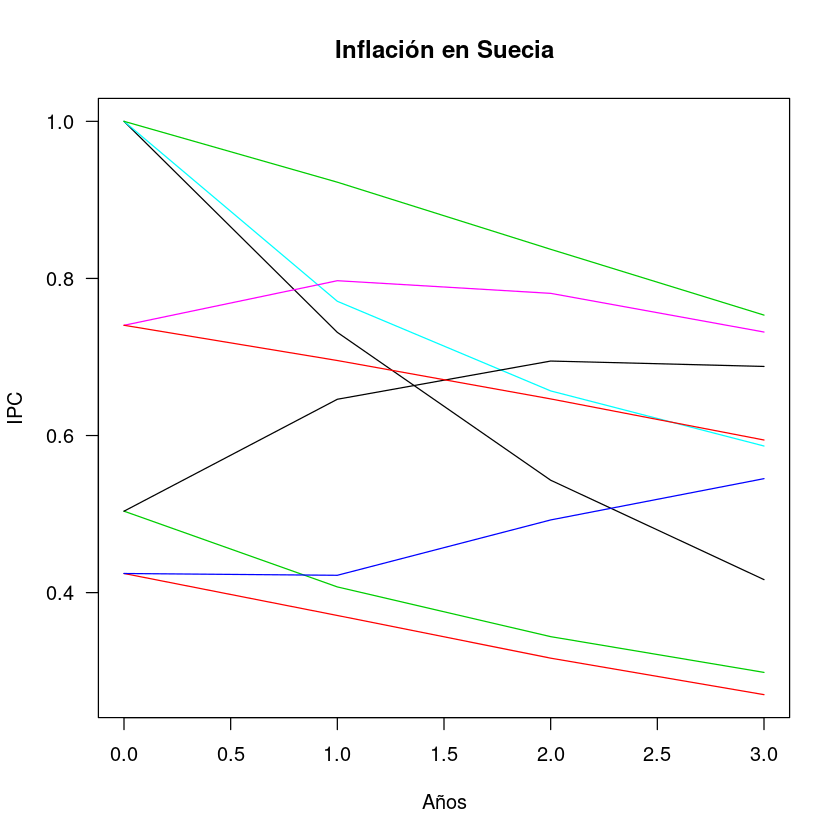

In [64]:
matplot(pasosH, cbind(uu,ud,ut,du,dd,dt,tu,td,tt),type="l",lty=c(1,1),xlab='Años',ylab='IPC',main='Inflación en Suecia',las=1)